<a href="https://colab.research.google.com/github/Guilherme-Inkotte/ml-tumor-classification/blob/main/ML_Formativa_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Avaliação Formativa - Classificação de Tumores

O ICMR (Conselho Indiano de Pesquisa Médica, na sigla em inglês) deseja analisar diferentes tipos de câncer, como câncer de mama, câncer renal, câncer de cólon, câncer de pulmão e câncer de próstata, que se tornaram uma causa de preocupação nos últimos anos. Eles gostariam de identificar a provável causa desses cânceres em termos de genes responsáveis por cada tipo de câncer. Isso nos levaria à identificação precoce de cada tipo de câncer, reduzindo a taxa de fatalidade.

Detalhes do conjunto de dados:
A base de dados de entrada contém 802 amostras para as 802 pessoas que foram detectadas com diferentes tipos de câncer. Cada amostra contém valores de expressão de mais de 20 mil genes. As amostras têm um dos tipos de tumores: BRCA, KIRC, COAD, LUAD e PRAD.


Maiores detalhes podem ser encontrados em [Kaggle ICMR](https://www.kaggle.com/datasets/shibumohapatra/icmr-data)


Os alunos devem utilizar os conhecimentos adquiridos na disciplina para desenvolver um modelo de aprendizado de máquina para classificar os tumores.

O trabalho consiste em: 



*   Pré-Processamento dos dados (Converter dados categoricos, normalização, etc)
*   Análise Exploratória (Analisar desbalanceamentos e distribuição das classes)

*   Se necessário aplicar técnicas de balanceamento e reducão (PCA)

*   Treinar os modelos (KNN, NB, DT) e realizar as análises crítitcas


In [ ]:
! pip install -q kaggle
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"guiinkotte","key":"da36e24a22d44ae4e69c298ea5d57130"}'}

In [ ]:
! chmod 600 /root/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! kaggle datasets list

ref                                                           title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                         Spotify and Youtube                              9MB  2023-03-20 15:43:25           2404         97  1.0              
usamabuttar/world-happiness-report-2005-present               World Happiness Report 2005-Present            123KB  2023-03-25 17:38:26            782         25  1.0              
dgoenrique/netflix-movies-and-tv-shows                        Netflix Movies and TV Shows                      2MB  2023-03-13 18:49:00           1672         47  1.0              
rajkumarpandey02/list-of-countries-by-gdp-sector-composition  List of Countries by GDP Sector C

In [ ]:
!kaggle datasets download 'shibumohapatra/icmr-data'


 84% 59.0M/70.6M [00:00<00:00, 72.1MB/s]
100% 70.6M/70.6M [00:01<00:00, 73.0MB/s]


In [ ]:
!unzip icmr-data.zip

Archive:  icmr-data.zip
  inflating: data.csv                
  inflating: labels.csv              


In [ ]:
import pandas as pd

df = pd.read_csv('data.csv')
classes = pd.read_csv('labels.csv')


In [ ]:
df.head(20)

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
5,sample_5,0.0,3.467853,3.581918,6.620243,9.706829,0.0,7.758510,0.000000,0.0,...,5.726657,8.602588,9.928339,6.096154,9.816001,11.556995,9.244150,9.836473,5.355133,0.000000
6,sample_6,0.0,1.224966,1.691177,6.572007,9.640511,0.0,6.754888,0.531868,0.0,...,5.105904,7.927968,9.673966,1.877744,9.802692,13.256060,9.664486,9.244219,8.330912,0.000000
7,sample_7,0.0,2.854853,1.750478,7.226720,9.758691,0.0,5.952103,0.000000,0.0,...,5.297833,8.277092,9.599230,5.244290,9.994339,12.670377,9.987733,9.216872,6.551490,0.000000
8,sample_8,0.0,3.992125,2.772730,6.546692,10.488252,0.0,7.690222,0.352307,0.0,...,6.721974,9.597533,9.763753,7.933278,10.952880,12.498919,10.389954,10.390255,7.828321,0.000000
9,sample_9,0.0,3.642494,4.423558,6.849511,9.464466,0.0,7.947216,0.724214,0.0,...,6.020051,8.712809,10.259096,6.131583,9.923582,11.144295,9.244851,9.484299,4.759151,0.000000


In [ ]:
classes.head(20)

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA
5,sample_5,PRAD
6,sample_6,KIRC
7,sample_7,PRAD
8,sample_8,BRCA
9,sample_9,PRAD


<Axes: xlabel='Class', ylabel='count'>

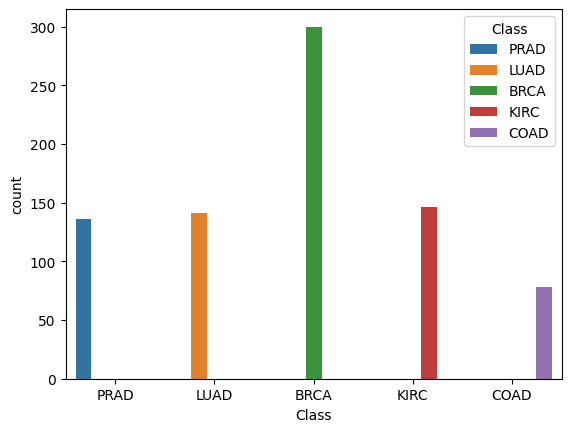

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=classes,x='Class',hue='Class')
plt.xticks(rotation=45, ha='right');

In [ ]:
X = df.drop(['Unnamed: 0'], axis=1).values
y = classes['Class'].values
print(X.shape)
print(y.shape)

(801, 20531)
(801,)


Under Sampling

Dados balanceados


<Axes: >

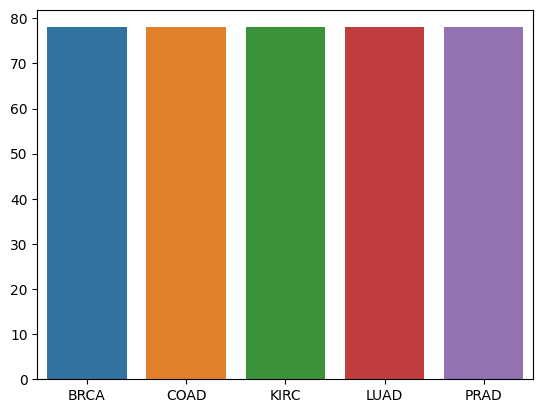

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
random_state = 9999
sampler = RandomUnderSampler(random_state=random_state)
X_bal, y_bal = sampler.fit_resample(X, y)

raw_data = {'x': [], 'y': []}
for i in y_bal:
  if i in raw_data['x']:
    raw_data['y'][raw_data['x'].index(i)] += 1
    continue
  raw_data['x'].append(i)
  raw_data['y'].append(1)

print('Dados balanceados')
sns.barplot(x='x', y='y', data=raw_data)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_bal, y_bal, test_size=0.33, random_state=9999
)

#KNN

TREINO:
              precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00        53
        COAD       1.00      1.00      1.00        51
        KIRC       1.00      1.00      1.00        56
        LUAD       1.00      1.00      1.00        46
        PRAD       1.00      1.00      1.00        55

    accuracy                           1.00       261
   macro avg       1.00      1.00      1.00       261
weighted avg       1.00      1.00      1.00       261

TESTE:
              precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00        25
        COAD       1.00      1.00      1.00        27
        KIRC       1.00      1.00      1.00        22
        LUAD       1.00      1.00      1.00        32
        PRAD       1.00      1.00      1.00        23

    accuracy                           1.00       129
   macro avg       1.00      1.00      1.00       129
weighted avg       1.00      1.00      1.00       129



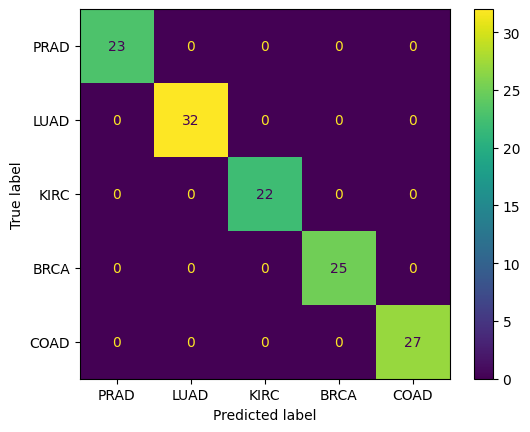

In [ ]:
model = KNeighborsClassifier()

model.fit(X_train, y_train);
y_pred = model.predict(X_train)

report = classification_report(y_train,y_pred)
print('TREINO:')
print(report)

y_pred = model.predict(X_test)

report = classification_report(y_test,y_pred)
print('TESTE:')
print(report)

labels = ['PRAD', 'LUAD', 'KIRC', 'BRCA', 'COAD']
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

#NB

TREINO:
              precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00        53
        COAD       1.00      1.00      1.00        51
        KIRC       1.00      1.00      1.00        56
        LUAD       1.00      1.00      1.00        46
        PRAD       1.00      1.00      1.00        55

    accuracy                           1.00       261
   macro avg       1.00      1.00      1.00       261
weighted avg       1.00      1.00      1.00       261

TESTE:
              precision    recall  f1-score   support

        BRCA       0.95      0.72      0.82        25
        COAD       1.00      0.93      0.96        27
        KIRC       0.72      0.95      0.82        22
        LUAD       0.91      0.94      0.92        32
        PRAD       0.96      0.96      0.96        23

    accuracy                           0.90       129
   macro avg       0.91      0.90      0.90       129
weighted avg       0.91      0.90      0.90       129



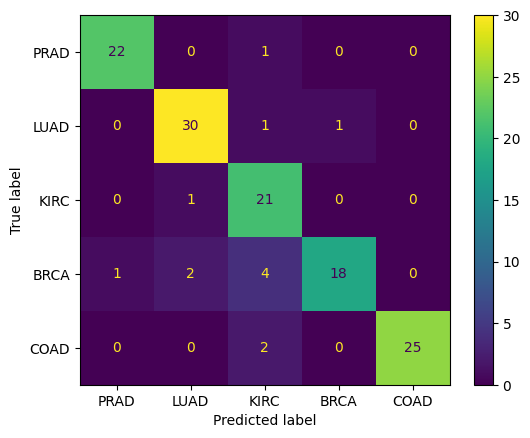

In [ ]:
model = GaussianNB()

model.fit(X_train, y_train);
y_pred = model.predict(X_train)

report = classification_report(y_train,y_pred)
print('TREINO:')
print(report)

y_pred = model.predict(X_test)

report = classification_report(y_test,y_pred)
print('TESTE:')
print(report)

labels = ['PRAD', 'LUAD', 'KIRC', 'BRCA', 'COAD']
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

#Árvore de decisão

TREINO:
              precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00        53
        COAD       1.00      1.00      1.00        51
        KIRC       1.00      1.00      1.00        56
        LUAD       1.00      1.00      1.00        46
        PRAD       1.00      1.00      1.00        55

    accuracy                           1.00       261
   macro avg       1.00      1.00      1.00       261
weighted avg       1.00      1.00      1.00       261

TESTE:
              precision    recall  f1-score   support

        BRCA       0.96      0.88      0.92        25
        COAD       0.96      0.89      0.92        27
        KIRC       1.00      1.00      1.00        22
        LUAD       0.86      0.94      0.90        32
        PRAD       0.92      0.96      0.94        23

    accuracy                           0.93       129
   macro avg       0.94      0.93      0.93       129
weighted avg       0.93      0.93      0.93       129



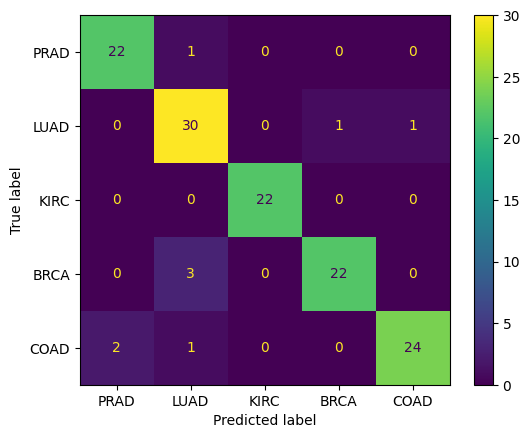

In [ ]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train);
y_pred = model.predict(X_train)

report = classification_report(y_train,y_pred)
print('TREINO:')
print(report)

y_pred = model.predict(X_test)

report = classification_report(y_test,y_pred)
print('TESTE:')
print(report)

labels = ['PRAD', 'LUAD', 'KIRC', 'BRCA', 'COAD']
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();